In [12]:
using Revise
include("../../src/Finite_Vol/Rep.jl")

using Plots, LaTeXStrings

In [6]:

function parametrize_deformation(R, δ;para=2.0,scale=1.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    para: 调节变形幅度的参数
    scale: +1 压扁 -1 拉长
    - δ = 0: 球形 (a=b=c=R)
    - δ > 0 (且 scale=1.0): 扁平椭球(a=b > c)
    - δ > 0 (且 scale=-1.0): 拉长椭球(a=b < c)
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(scale * 2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end


parametrize_deformation (generic function with 1 method)

In [24]:
R = 30.0
e = 0.0
a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)

ints = get_nodes_el(128, a, b, c, modes="D")

X0 = [-0.01, -0.01, -0.2, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
Ts = 300.0:-2.00:150
mu_B = 600.0
Ss = zeros(length(Ts))
etas = zeros(length(Ts))
for (j, T) in enumerate(Ts)
    println("T = $T MeV")
    X0 = Tmu(T/hc, mu_B/hc, X0, ints)
    etas[j] = trans_eff(X0, T/hc, mu_B/hc, ints)[3]
    Ss[j] = DTOmega(1.001 * X0, T/hc, mu_B/hc, ints)
end


a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
T = 300.0 MeV
T = 298.0 MeV
T = 296.0 MeV
T = 294.0 MeV
T = 292.0 MeV
T = 290.0 MeV
T = 288.0 MeV
T = 286.0 MeV
T = 284.0 MeV
T = 282.0 MeV
T = 280.0 MeV
T = 278.0 MeV
T = 276.0 MeV
T = 274.0 MeV
T = 272.0 MeV
T = 270.0 MeV
T = 268.0 MeV
T = 266.0 MeV
T = 264.0 MeV
T = 262.0 MeV
T = 260.0 MeV
T = 258.0 MeV
T = 256.0 MeV
T = 254.0 MeV
T = 252.0 MeV
T = 250.0 MeV
T = 248.0 MeV
T = 246.0 MeV
T = 244.0 MeV
T = 242.0 MeV
T = 240.0 MeV
T = 238.0 MeV
T = 236.0 MeV
T = 234.0 MeV
T = 232.0 MeV
T = 230.0 MeV
T = 228.0 MeV
T = 226.0 MeV
T = 224.0 MeV
T = 222.0 MeV
T = 220.0 MeV
T = 218.0 MeV
T = 216.0 MeV
T = 214.0 MeV
T = 212.0 MeV
T = 210.0 MeV
T = 208.0 MeV
T = 206.0 MeV
T = 204.0 MeV
T = 202.0 MeV
T = 200.0 MeV
T = 198.0 MeV
T = 196.0 MeV
T = 194.0 MeV
T = 192.0 MeV
T = 190.0 MeV
T = 188.0 MeV
T = 186.0 MeV
T = 184.0 MeV
T = 182.0 MeV
T = 180.0 MeV
T = 178.0 MeV
T = 176.0 MeV
T = 174.0 MeV
T = 172.0 MeV
T = 170.0 MeV
T = 168.0 MeV
T = 166.0 MeV
T =

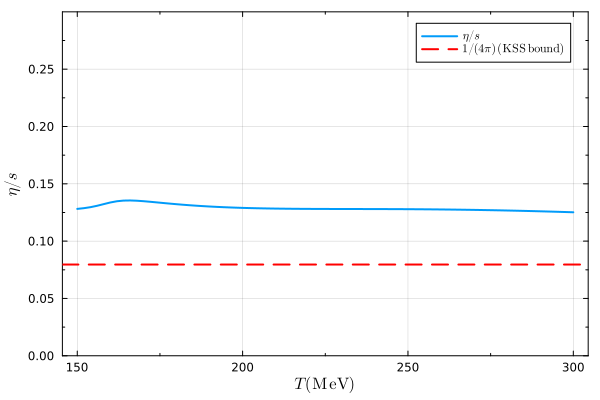

In [25]:
eta_s = etas ./ Ss 

# 计算 1/(4π) 的值
kss_bound = 1 / (4 * π)

p = plot(Ts, eta_s, 
         xlabel=L"T \, (\mathrm{MeV})", 
         ylabel=L"\eta/s",
         lw=2, 
         label=L"\eta/s",
         framestyle=:box,
         grid=true,
         ylim=(0, 0.3),
         minorticks=2)

# 添加 KSS 界限线
hline!([kss_bound], 
       lw=2, 
       linestyle=:dash, 
       color=:red,
       label=L"1/(4\pi) \, (\mathrm{KSS \, bound})")

display(p)